<a href="https://colab.research.google.com/github/Nakib-Nasrullah/Research-Skill/blob/main/Introdection_to_Machine_Learning_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# **Load The dataset**

In [2]:
print("Reading the real cancer dataset..")
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/drive/MyDrive/Datasets/Breast_Cancer_Wisconsin_Dataset.csv')

Reading the real cancer dataset..
Mounted at /content/drive


# **Prepare Data**

we use PCA principle component analysis algorithm for feature enginnearing.

In [3]:
print("Convert M -> 1 (Malignant Cancerr) and B -> 0(Benign Cancer)")

#Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Select only the most importent features (Make it simple!!)

importent_features = [
    'radius_mean',
    'texture_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
]

Convert M -> 1 (Malignant Cancerr) and B -> 0(Benign Cancer)


In [4]:
#Create simple dataset
X = data[importent_features]  # Patient mesurments
y = data['diagnosis_numeric']  # Malignant (1) or Benign (0)

print(f"X (Measurments): {X.shape}")
print(f"y (diagnosis): {y.shape}")

X (Measurments): (569, 5)
y (diagnosis): (569,)


# **Train Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=30
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing: {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\nTaining Examples (Computer learns from these):")
print(X_train.head())

Training: 455 patients (computer will learn from these)
Testing: 114 patients (computer will be tested on these)

Taining Examples (Computer learns from these):
     radius_mean  texture_mean  area_mean  smoothness_mean  compactness_mean
392        15.49         19.97      744.7          0.11600           0.15620
150        13.00         20.78      519.4          0.11350           0.07589
117        14.87         16.67      682.5          0.11620           0.16490
38         14.99         25.20      698.8          0.09387           0.05131
319        12.43         17.00      477.3          0.07557           0.03454


# **Teain with Decision Tree**

In [10]:
# Creat  my AI doctor

Ai_doctor = DecisionTreeClassifier(
    max_depth=5,
    random_state=20
)

print("Teaching Ai_doctor with training data..")
# Train the model
Ai_doctor.fit(X_train, y_train)
print("Ai_doctor training compleated...")

Teaching Ai_doctor with training data..
Ai_doctor training compleated...


# **Test our Ai_Doctor**
Avoid Over fiting and Under  fiting we use PCA Principle Component Analysis.

We mention in our paper about Over fitnig and Under fitting.

In [11]:
from sklearn.metrics.pairwise import PAIRWISE_DISTANCE_FUNCTIONS
print("Now let's see how good our Ai_doctor perform is.")

# Make predictions
predictions = Ai_doctor.predict(X_test)

print("Ai_doctor made predections for all test  patients!!")

# Calculate accuricy
accuricy = accuracy_score(y_test, predictions)
print(f"\nAi_doctor Accuricy: {accuricy:.3f} ({accuricy*100:.1f}%)")

if accuricy > 0.95:
  print("Excellent! Our Ai_doctor is very good accurate!!")
elif accuricy > 0.90:
  print("Good! Our Ai_doctor perform well!!")
elif accuricy > 0.80:
  print("Okk! Our Ai_doctor is decent!!")
else:
  print("Needs impovement.")

Now let's see how good our Ai_doctor perform is.
Ai_doctor made predections for all test  patients!!

Ai_doctor Accuricy: 0.904 (90.4%)
Good! Our Ai_doctor perform well!!


**Corelation metrics** PCA (Principle Component Acuricy)
1.Heap Map
2.Computer vision mainly work on image.


# **Confution Matrix**

Confusion Matricx:
[[64  6]
 [ 5 39]]

Correct: 103
Wrong: 11


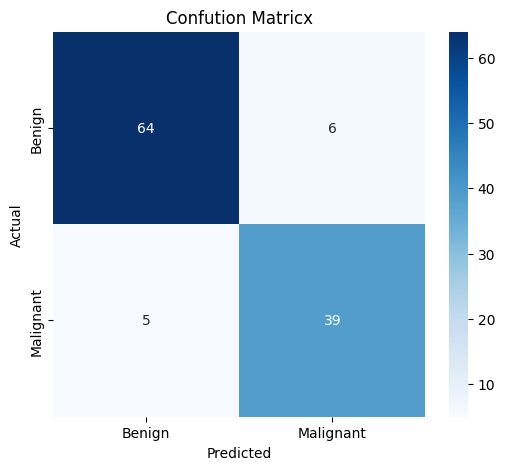

In [13]:
# Calculate confusion matricx
cm = confusion_matrix(y_test, predictions)

# Print it
print("Confusion Matricx:")
print(cm)
print(f"\nCorrect: {cm[0,0] + cm[1,1]}")
print(f"Wrong: {cm[0,1] + cm[1,0]}")

# Plot it
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confution Matricx')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Detail Performence**

In [14]:
from pandas._libs.tslibs.offsets import FY5253Quarter
# Calculate metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print them
print(f"Accuricy: {accuracy: .2f}")
print(f"Precision: {precision: .2f}")
print(f"Recall: {recall: .2f}")
print(f"F1-Score: {f1: .2f}")

Accuricy:  0.90
Precision:  0.87
Recall:  0.89
F1-Score:  0.88


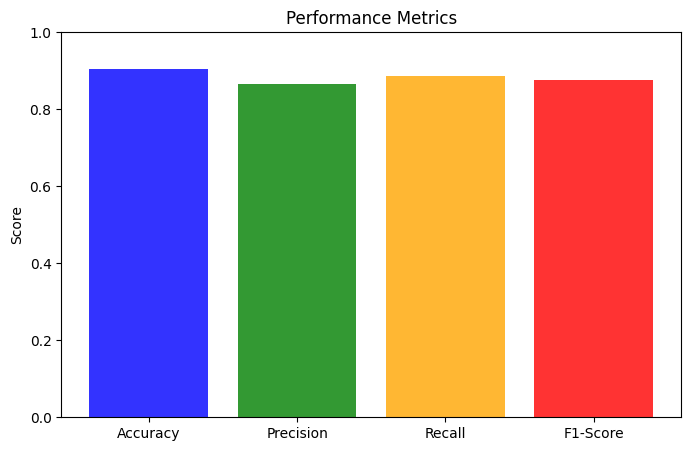

In [15]:
# simple bar chart
plt.figure(figsize=(8,5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], alpha=0.8)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()